## Import modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
from sklearn.linear_model import LinearRegression
sns.set()

## Import data

In [3]:
raw_data = pd.read_csv('cars_price_data.csv')

In [4]:
data = raw_data.copy()

In [5]:
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


## Explore Data

In [6]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [7]:
# check missing values
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [8]:
4195*0.05

209.75

In [9]:
4173*0.05

208.65

In [10]:
# the number of missing values is under 5% of total observation, so we can drop all of missing values without a doubt
data_no_mv = data.dropna(axis = 0)
data_no_mv

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520


In [11]:
#No more mmissing values now
data_no_mv.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

## Deal with outliers
from the descriptive statistics we saw above, the max value is alot higher than both  
mean and even 75 percentile, that means there are OUTLIERs

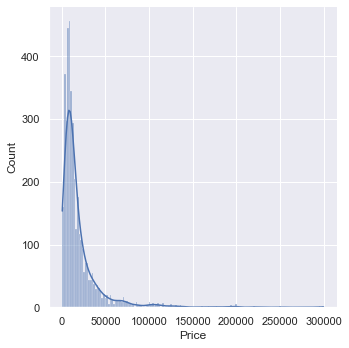

In [12]:
# PRICE
sns.displot(data_no_mv['Price'], kde = True)

In [13]:
q = data_no_mv['Price'].quantile(0.95)
data_v1 = data_no_mv[data_no_mv['Price']<q]

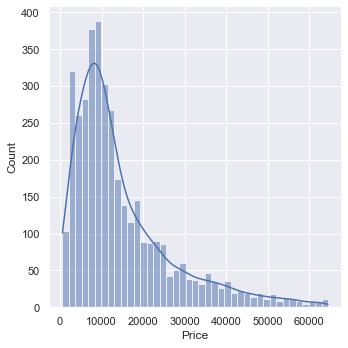

In [14]:
sns.displot(data_v1['Price'], kde = True)

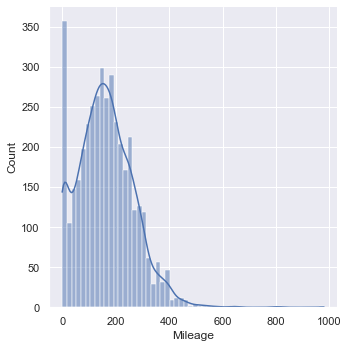

In [15]:
# MILEAGE
sns.displot(data_no_mv['Mileage'], kde = True)

In [16]:
q = data_v1['Mileage'].quantile(0.99)
data_v2 = data_v1[data_v1['Mileage']<q]

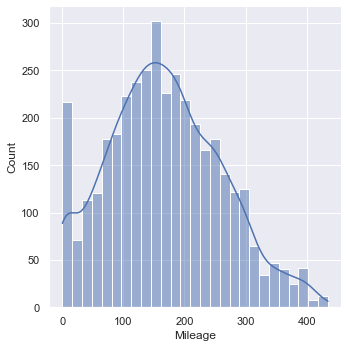

In [17]:
sns.displot(data_v2['Mileage'], kde = True)

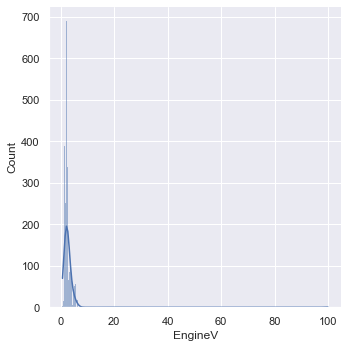

In [18]:
# EngineV (engine volumn)
sns.displot(data_no_mv['EngineV'], kde = True)

In [19]:
# From a quick Google search shows the valid is in range 0.6 to 6.5
# So we delete outliers over 6.5
data_v3 = data_v2[data_v2['EngineV'] < 6.5]

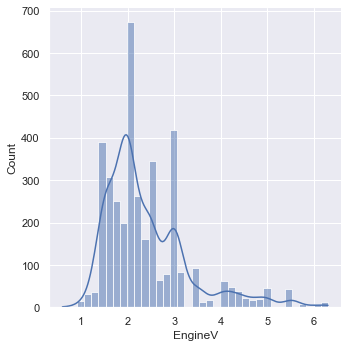

In [20]:
sns.displot(data_v3['EngineV'], kde = True)

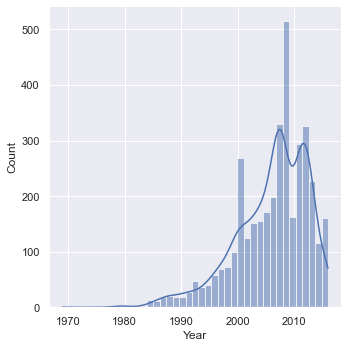

In [21]:
# Year
sns.displot(data_v3['Year'], kde = True)

In [22]:
# The outlier is on the left side
q = data_v3['Year'].quantile(0.01)
data_v4 = data_v3[data_v3['Year'] > q]

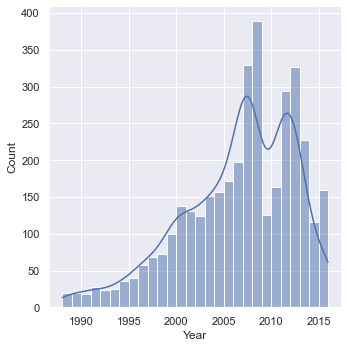

In [23]:
sns.displot(data_v4['Year'], kde = True)

In [24]:
data_v4.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3707,3707.000000,3707,3707.000000,3707.000000,3707,3707,3707.000000,3707
unique,7,NaN,6,NaN,NaN,4,2,NaN,282
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,840,NaN,1430,NaN,NaN,1695,3345,NaN,181
mean,NaN,15206.739496,NaN,166.731589,2.408435,NaN,NaN,2006.360399,NaN
std,NaN,12213.872637,NaN,92.674124,0.920792,NaN,NaN,5.982401,NaN
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,NaN
25%,NaN,7000.000000,NaN,100.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11115.000000,NaN,160.000000,2.000000,NaN,NaN,2007.000000,NaN
75%,NaN,19750.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000,NaN


In [25]:
pd.set_option('display.max_rows', 10)
data_v4

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4337,Renault,6800.0,sedan,152,1.6,Petrol,yes,2007,Megane
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter)
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535


In [26]:
# reset the index to count the only row after preprocessed
data_cleaned = data_v4.reset_index(drop = True)

In [27]:
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
3702,Renault,6800.0,sedan,152,1.6,Petrol,yes,2007,Megane
3703,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter)
3704,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
3705,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535


## Checking OLS assumption 
whether it's suitable to use linear regression

In [29]:
data_cleaned.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3707,3707.000000,3707,3707.000000,3707.000000,3707,3707,3707.000000,3707
unique,7,NaN,6,NaN,NaN,4,2,NaN,282
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,840,NaN,1430,NaN,NaN,1695,3345,NaN,181
mean,NaN,15206.739496,NaN,166.731589,2.408435,NaN,NaN,2006.360399,NaN
...,...,...,...,...,...,...,...,...,...
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,NaN
25%,NaN,7000.000000,NaN,100.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11115.000000,NaN,160.000000,2.000000,NaN,NaN,2007.000000,NaN
75%,NaN,19750.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000,NaN


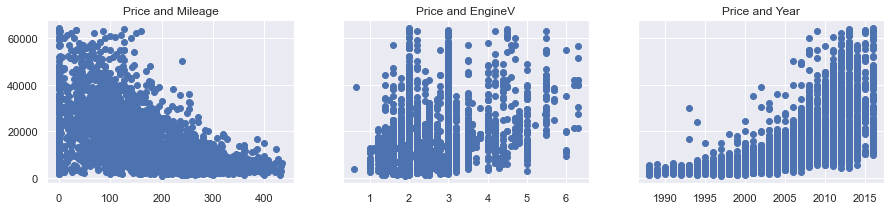

In [32]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey = True, figsize = (15,3))
ax1.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax1.set_title('Price and Mileage')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax3.set_title('Price and Year')
plt.show()

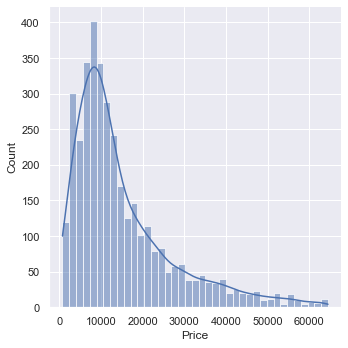

In [33]:
sns.displot(data_cleaned['Price'], kde = True)

### Relaxing OLS assumptions
the scatter plot shows there no matching line for linear regression,  
however, it's exponential trend, if we take log we will get a linear!

In [34]:
data_cleaned['log_Price'] = np.log(data_cleaned['Price'])

In [35]:
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_Price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656
...,...,...,...,...,...,...,...,...,...,...
3702,Renault,6800.0,sedan,152,1.6,Petrol,yes,2007,Megane,8.824678
3703,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter),9.350102
3704,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla,9.792556
3705,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535,8.779557


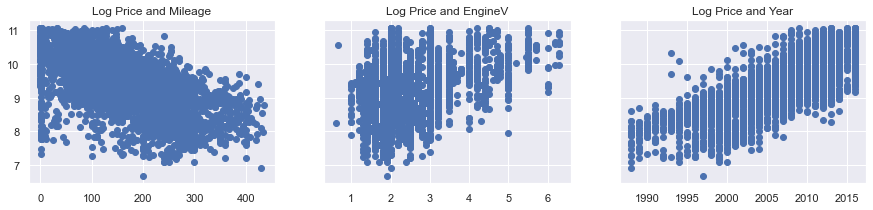

In [37]:
# now it looked more linear
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey = True, figsize = (15,3))
ax1.scatter(data_cleaned['Mileage'], data_cleaned['log_Price'])
ax1.set_title('Log Price and Mileage')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_Price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Year'], data_cleaned['log_Price'])
ax3.set_title('Log Price and Year')
plt.show()

### Multicollinearity

In [40]:
data_cleaned.columns.values

array(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model', 'log_Price'], dtype=object)

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','EngineV','Year']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['Feature'] = variables.columns
vif

,VIF,Feature
0,4.233150,Mileage
1,7.882953,EngineV
2,10.355853,Year


In [46]:
# Year has very high VIF (>10) which causes multicollinearity, so we have to drop it
data_cleaned_no_multicollinearity = data_cleaned.drop(['Year'], axis = 1)

In [47]:
data_cleaned_no_multicollinearity

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Model,log_Price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,320,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,Sprinter 212,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,S 500,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,Q7,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,Rav 4,9.814656
...,...,...,...,...,...,...,...,...,...
3702,Renault,6800.0,sedan,152,1.6,Petrol,yes,Megane,8.824678
3703,Volkswagen,11500.0,van,163,2.5,Diesel,yes,T5 (Transporter),9.350102
3704,Toyota,17900.0,sedan,35,1.6,Petrol,yes,Corolla,9.792556
3705,BMW,6500.0,sedan,1,3.5,Petrol,yes,535,8.779557


## Create Dummy variables
create dummies for each categorical data to be numeric  
drop first rows of each variable to prevent multicollinearity  
explain: if every rows filled with 1 only 1 column each, that means if other columns are 0s,  
so it can determine that exact 1 value, and vice versa. It can cause multicollinearity

In [48]:
data_dummies = pd.get_dummies(data_cleaned_no_multicollinearity, drop_first = True)

In [49]:
data_dummies

,Price,Mileage,EngineV,log_Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,4200.0,277,2.0,8.342840,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7900.0,427,2.9,8.974618,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13300.0,358,5.0,9.495519,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23000.0,240,4.2,10.043249,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18300.0,120,2.0,9.814656,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3702,6800.0,152,1.6,8.824678,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3703,11500.0,163,2.5,9.350102,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3704,17900.0,35,1.6,9.792556,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3705,6500.0,1,3.5,8.779557,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Rearrange variables
dependent variable -> Independent numeric variable -> Dummy variables

In [51]:
data_dummies.columns.values

array(['Price', 'Mileage', 'EngineV', 'log_Price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_100', 'Model_11', 'Model_116', 'Model_118', 'Model_120',
       'Model_19', 'Model_190', 'Model_200', 'Model_210', 'Model_220',
       'Model_230', 'Model_25', 'Model_250', 'Model_300', 'Model_316',
       'Model_318', 'Model_320', 'Model_323', 'Model_325', 'Model_328',
       'Model_330', 'Model_335', 'Model_4 Series Gran Coupe', 'Model_428',
       'Model_4Runner', 'Model_5 Series', 'Model_5 Series GT',
       'Model_520', 'Model_523', 'Model_524', 'Model_525', 'Model_528',
       'Model_530', 'Model_535', 'Model_540', 'Model_545', 'Model_550',
       'Model_630', 'Model_640', 'Model_645', 'Model_650', 'Model_730',
       'Model_735', 'Mo

In [52]:
cols = ['log_Price', 'Price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_100', 'Model_11', 'Model_116', 'Model_118', 'Model_120',
       'Model_19', 'Model_190', 'Model_200', 'Model_210', 'Model_220',
       'Model_230', 'Model_25', 'Model_250', 'Model_300', 'Model_316',
       'Model_318', 'Model_320', 'Model_323', 'Model_325', 'Model_328',
       'Model_330', 'Model_335', 'Model_4 Series Gran Coupe', 'Model_428',
       'Model_4Runner', 'Model_5 Series', 'Model_5 Series GT',
       'Model_520', 'Model_523', 'Model_524', 'Model_525', 'Model_528',
       'Model_530', 'Model_535', 'Model_540', 'Model_545', 'Model_550',
       'Model_630', 'Model_640', 'Model_645', 'Model_650', 'Model_730',
       'Model_735', 'Model_740', 'Model_745', 'Model_750', 'Model_760',
       'Model_80', 'Model_9', 'Model_90', 'Model_A 140', 'Model_A 150',
       'Model_A 170', 'Model_A 180', 'Model_A1', 'Model_A3', 'Model_A4',
       'Model_A4 Allroad', 'Model_A5', 'Model_A6', 'Model_A6 Allroad',
       'Model_A7', 'Model_A8', 'Model_ASX', 'Model_Amarok', 'Model_Auris',
       'Model_Avalon', 'Model_Avensis', 'Model_Aygo', 'Model_B 170',
       'Model_B 180', 'Model_B 200', 'Model_Beetle', 'Model_Bora',
       'Model_C-Class', 'Model_CL 180', 'Model_CL 500', 'Model_CL 55 AMG',
       'Model_CL 550', 'Model_CL 63 AMG', 'Model_CLA 200',
       'Model_CLA 220', 'Model_CLA-Class', 'Model_CLC 180',
       'Model_CLC 200', 'Model_CLK 200', 'Model_CLK 220', 'Model_CLK 230',
       'Model_CLK 240', 'Model_CLK 280', 'Model_CLK 320', 'Model_CLK 430',
       'Model_CLS 350', 'Model_CLS 500', 'Model_CLS 63 AMG',
       'Model_Caddy', 'Model_Camry', 'Model_Captur', 'Model_Caravelle',
       'Model_Carina', 'Model_Carisma', 'Model_Celica', 'Model_Clio',
       'Model_Colt', 'Model_Corolla', 'Model_Corolla Verso',
       'Model_Cross Touran', 'Model_Dokker', 'Model_Duster',
       'Model_E-Class', 'Model_Eclipse', 'Model_Eos', 'Model_Espace',
       'Model_FJ Cruiser', 'Model_Fluence', 'Model_Fortuner',
       'Model_G 320', 'Model_G 500', 'Model_G 55 AMG', 'Model_G 63 AMG',
       'Model_GL 320', 'Model_GL 350', 'Model_GL 420', 'Model_GL 450',
       'Model_GL 500', 'Model_GL 550', 'Model_GLC-Class', 'Model_GLK 220',
       'Model_GLK 300', 'Model_Galant', 'Model_Golf GTI', 'Model_Golf II',
       'Model_Golf III', 'Model_Golf IV', 'Model_Golf Plus',
       'Model_Golf V', 'Model_Golf VI', 'Model_Golf VII',
       'Model_Golf Variant', 'Model_Grand Scenic', 'Model_Grandis',
       'Model_Hiace', 'Model_Highlander', 'Model_Hilux', 'Model_I3',
       'Model_IQ', 'Model_Jetta', 'Model_Kangoo', 'Model_Koleos',
       'Model_L 200', 'Model_LT', 'Model_Laguna', 'Model_Lancer',
       'Model_Lancer Evolution', 'Model_Lancer X',
       'Model_Lancer X Sportback', 'Model_Land Cruiser 100',
       'Model_Land Cruiser 105', 'Model_Land Cruiser 200',
       'Model_Land Cruiser 76', 'Model_Land Cruiser 80',
       'Model_Land Cruiser Prado', 'Model_Latitude', 'Model_Logan',
       'Model_Lupo', 'Model_M5', 'Model_MB', 'Model_ML 250',
       'Model_ML 270', 'Model_ML 280', 'Model_ML 320', 'Model_ML 350',
       'Model_ML 400', 'Model_ML 430', 'Model_ML 500', 'Model_ML 550',
       'Model_ML 63 AMG', 'Model_Master', 'Model_Matrix', 'Model_Megane',
       'Model_Modus', 'Model_Multivan', 'Model_New Beetle',
       'Model_Outlander', 'Model_Outlander XL', 'Model_Pajero',
       'Model_Pajero Pinin', 'Model_Pajero Sport', 'Model_Pajero Wagon',
       'Model_Passat B3', 'Model_Passat B4', 'Model_Passat B5',
       'Model_Passat B6', 'Model_Passat B7', 'Model_Passat B8',
       'Model_Passat CC', 'Model_Phaeton', 'Model_Pointer', 'Model_Polo',
       'Model_Previa', 'Model_Prius', 'Model_Q3', 'Model_Q5', 'Model_Q7',
       'Model_R 320', 'Model_R8', 'Model_Rav 4', 'Model_S 140',
       'Model_S 250', 'Model_S 300', 'Model_S 320', 'Model_S 350',
       'Model_S 400', 'Model_S 430', 'Model_S 500', 'Model_S 550',
       'Model_S 600', 'Model_S 63 AMG', 'Model_S4', 'Model_S5',
       'Model_S8', 'Model_SL 500 (550)', 'Model_SL 55 AMG',
       'Model_SLK 200', 'Model_SLK 350', 'Model_Sandero',
       'Model_Sandero StepWay', 'Model_Scenic', 'Model_Scion',
       'Model_Scirocco', 'Model_Sequoia', 'Model_Sharan', 'Model_Sienna',
       'Model_Smart', 'Model_Space Star', 'Model_Space Wagon',
       'Model_Sprinter 208', 'Model_Sprinter 210', 'Model_Sprinter 211',
       'Model_Sprinter 212', 'Model_Sprinter 213', 'Model_Sprinter 311',
       'Model_Sprinter 312', 'Model_Sprinter 313', 'Model_Sprinter 315',
       'Model_Sprinter 316', 'Model_Sprinter 318', 'Model_Sprinter 319',
       'Model_Symbol', 'Model_Syncro', 'Model_T3 (Transporter)',
       'Model_T4 (Transporter)', 'Model_T4 (Transporter) ',
       'Model_T5 (Transporter)', 'Model_T5 (Transporter) ',
       'Model_T6 (Transporter)', 'Model_T6 (Transporter) ', 'Model_TT',
       'Model_Tacoma', 'Model_Tiguan', 'Model_Touareg', 'Model_Touran',
       'Model_Trafic', 'Model_Tundra', 'Model_Up', 'Model_Vaneo',
       'Model_Vento', 'Model_Venza', 'Model_Viano', 'Model_Virage',
       'Model_Vista', 'Model_Vito', 'Model_X1', 'Model_X3', 'Model_X5',
       'Model_X5 M', 'Model_X6', 'Model_X6 M', 'Model_Yaris', 'Model_Z3',
       'Model_Z4']

In [54]:
data_preprocessed = data_dummies[cols]

In [55]:
data_preprocessed

,log_Price,Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,8.342840,4200.0,277,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8.974618,7900.0,427,2.9,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9.495519,13300.0,358,5.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10.043249,23000.0,240,4.2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.814656,18300.0,120,2.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3702,8.824678,6800.0,152,1.6,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3703,9.350102,11500.0,163,2.5,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3704,9.792556,17900.0,35,1.6,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3705,8.779557,6500.0,1,3.5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Linear Regression Model

### Inputs and targets

In [57]:
#targets is Y
targets = data_preprocessed['log_Price']

# inputs is X
# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = data_preprocessed.drop(['log_Price'], axis = 1)

### Features scaling

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [61]:
inputs_scaled = scaler.transform(inputs)

In [62]:
inputs_scaled

array([[-0.90128862,  1.19001165, -0.4436297 , ..., -0.06157074,
        -0.01642659, -0.0367508 ],
       [-0.59831353,  2.80880479,  0.53392205, ..., -0.06157074,
        -0.01642659, -0.0367508 ],
       [-0.15613367,  2.06415995,  2.81487612, ..., -0.06157074,
        -0.01642659, -0.0367508 ],
       ...,
       [ 0.22053807, -1.42164128, -0.87809715, ..., -0.06157074,
        -0.01642659, -0.0367508 ],
       [-0.71295275, -1.78856773,  1.18562321, ..., -0.06157074,
        -0.01642659, -0.0367508 ],
       [-0.13975664, -0.46115735, -0.4436297 , ..., -0.06157074,
        -0.01642659, -0.0367508 ]])

### Train Test split

In [64]:
from sklearn.model_selection import train_test_split

# do 80:20 split and set random seed
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size = 0.2, random_state = 55)

### CREATE REGRESSION MODEL

In [65]:
reg = LinearRegression()

In [66]:
reg.fit(x_train, y_train)

LinearRegression()

#### See the performance with training set

In [69]:
y_hat = reg.predict(x_train)

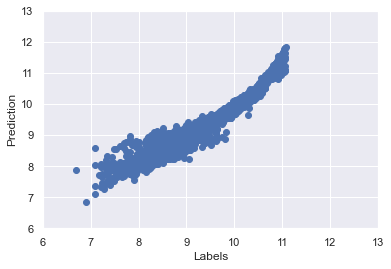

In [73]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction (The cross line)
plt.scatter(y_train, y_hat)
plt.xlabel('Labels')
plt.ylabel('Prediction')
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

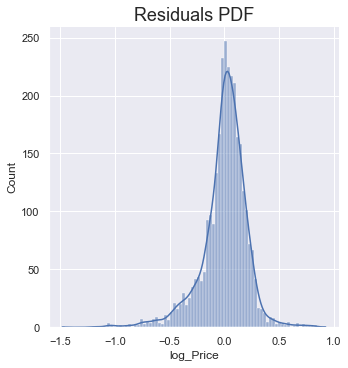

In [80]:
# Another way to test is to plot PDF (Probability Density Function)
sns.displot(y_train-y_hat, kde = True)
plt.title("Residuals PDF", size=18)
plt.show()
# In the best case scenario this plot should be normally distributed
# in our case the distribution shows very satisfied result
# however, we notice that there still are some values between -0.5 and 1.2
# Which means our y_hat is still higher than y_train for some values
# this is a room to improve

In [81]:
# Find the R-squared of the model
reg.score(x_train,y_train)

0.929168062748796

In [83]:
# Find Adjusted R-square for better measurement
# Pretty high! PERFECT! 
r2 = reg.score(x_train,y_train)
n = x_train.shape[0] # no. of records
p = x_train.shape[1] # no. of features

adj_r2 = 1-(1-r2)*((n-1)/(n-p-1))
adj_r2

0.9212210649108561

### Weights and bias

In [84]:
# bias
reg.intercept_

44208750998.45584

In [85]:
# weights
reg.coef_

array([ 5.35939633e-01, -8.67314609e-02,  7.42418990e-02,  5.59037171e+11,
        6.00710351e+11, -7.11736220e+10,  2.82282536e+11, -7.20869975e+11,
       -6.40127821e+11, -2.06451416e-02,  4.66918945e-03,  1.77612305e-02,
        2.68554688e-03, -2.82287598e-03, -1.12762451e-02, -4.73594666e-03,
       -1.83105469e-02,  1.98837280e-01,  9.80330156e+10,  1.09125785e+10,
        2.27375031e-02,  2.81867981e-02, -4.84466553e-03,  1.54306343e+10,
       -5.99670410e-03,  1.01318359e-02,  9.03320312e-03,  2.05688477e-02,
        1.25122070e-03,  1.09125785e+10,  5.58471680e-03, -4.28771973e-03,
        1.49688721e-02,  2.40783691e-02,  5.39093018e-02,  3.60870361e-03,
        2.02350616e-02,  1.62177086e-02,  1.96685791e-02,  1.73034668e-02,
        3.12805176e-03,  9.18579102e-03,  6.07148276e+10, -1.43062160e+12,
        1.04064941e-02,  6.61468506e-02,  1.88140869e-02,  7.00059990e+11,
        3.16162109e-02,  2.66418457e-02,  5.42526245e-02,  2.05230713e-02,
        4.35638428e-03,  

In [86]:
reg_summary = pd.DataFrame(inputs.columns.values, columns = ['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Price,5.359396e-01
1,Mileage,-8.673146e-02
2,EngineV,7.424190e-02
3,Brand_BMW,5.590372e+11
4,Brand_Mercedes-Benz,6.007104e+11
...,...,...
294,Model_X6,3.613281e-02
295,Model_X6 M,4.046080e+12
296,Model_Yaris,2.267753e+11
297,Model_Z3,1.000977e-02


### Test with the real test set

In [87]:
# Once we have trained and fine-tuned our model, we can proceed to testing it
# Testing is done on a dataset that the algorithm has never seen
# Luckily we have prepared such a dataset
# Our test inputs are 'x_test', while the outputs: 'y_test' 
# We SHOULD NOT TRAIN THE MODEL ON THEM, we just feed them and find the predictions
# If the predictions are far off, we will know that our model overfitted
y_hat_test = reg.predict(x_test)

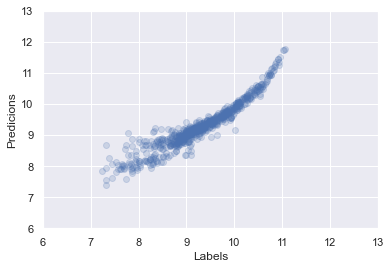

In [92]:
# look at the scatter plot again
# most of them are stacked in the linear line in the middle GOOD!
plt.scatter(y_test, y_hat_test, alpha = 0.2)
plt.xlabel('Labels')
plt.ylabel('Predicions')
plt.xlim(6,13) # Dont forget to scale it to see a 45 degree line
plt.ylim(6,13)
plt.show()

In [100]:
# Finally do manual check on the prediction values
# To obtain the actual prices, we take the exponential of the log_price
df_pf = pd.DataFrame(np.exp(y_hat_test), columns = ['Prediction'])
df_pf

<ipython-input-100-bb9382dcd88f>:3: RuntimeWarning: overflow encountered in exp
  df_pf = pd.DataFrame(np.exp(y_hat_test), columns = ['Prediction'])


,Prediction
0,3704.092630
1,11451.267630
2,7461.494336
3,6415.742468
4,22843.170570
...,...
737,74680.760661
738,13446.851174
739,7062.676355
740,10134.121042


In [101]:
# We can also include the test targets in that data frame (so we can manually compare them)
df_pf['Target'] = np.exp(y_test)
df_pf

# Note that we have a lot of missing values
# There is no reason to have ANY missing values, though
# This suggests that something is wrong with the data frame / indexing

,Prediction,Target
0,3704.092630,NaN
1,11451.267630,NaN
2,7461.494336,13300.0
3,6415.742468,NaN
4,22843.170570,NaN
...,...,...
737,74680.760661,NaN
738,13446.851174,10200.0
739,7062.676355,13300.0
740,10134.121042,NaN


In [102]:
# After displaying y_test, we find what the issue is
# The old indexes are preserved (recall earlier in that code we made a note on that)
# The code was: data_cleaned = data_4.reset_index(drop=True)

# Therefore, to get a proper result, we must reset the index and drop the old indexing
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0     8.242756
1     9.350102
2     8.496990
3     8.748146
4    10.275051
Name: log_Price, dtype: float64

In [103]:
# Let's overwrite the 'Target' column with the appropriate values
# Again, we need the exponential of the test log price
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,3704.092630,3800.0
1,11451.267630,11500.0
2,7461.494336,4900.0
3,6415.742468,6299.0
4,22843.170570,29000.0
...,...,...
737,74680.760661,51500.0
738,13446.851174,17500.0
739,7062.676355,6900.0
740,10134.121042,10000.0


In [104]:
# Additionally, we can calculate the difference between the targets and the predictions
# Note that this is actually the residual (we already plotted the residuals)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

# Since OLS is basically an algorithm which minimizes the total sum of squared errors (residuals),
# this comparison makes a lot of sense

In [105]:
# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,3704.092630,3800.0,95.907370,2.523878
1,11451.267630,11500.0,48.732370,0.423760
2,7461.494336,4900.0,-2561.494336,52.275395
3,6415.742468,6299.0,-116.742468,1.853349
4,22843.170570,29000.0,6156.829430,21.230446
...,...,...,...,...
737,74680.760661,51500.0,-23180.760661,45.011186
738,13446.851174,17500.0,4053.148826,23.160850
739,7062.676355,6900.0,-162.676355,2.357628
740,10134.121042,10000.0,-134.121042,1.341210


In [110]:
# Sometimes it is useful to check these outputs manually
# To see all rows, we use the relevant pandas syntax
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
436,22999.86,23000.00,0.14,0.00
82,5903.97,5900.00,-3.97,0.07
321,15010.21,14999.00,-11.21,0.07
728,8493.25,8500.00,6.75,0.08
614,37966.68,38000.00,33.32,0.09
36,17518.74,17500.00,-18.74,0.11
130,12920.67,12900.00,-20.67,0.16
409,9883.67,9900.00,16.33,0.16
674,15530.22,15500.00,-30.22,0.19
380,25960.65,25900.00,-60.65,0.23
